In [1]:

############### Cleaned the dataset ##############
#suffix 1 for the leftdatset, suffix 2 for the right dataset


In [3]:
import pandas as pd
# Load the datasets
left= pd.read_csv('left_dataset.csv')
right= pd.read_csv('right_dataset.csv')

In [4]:
# Select the specified columns from both datasets
left= left[['business_id', 'name', 'address', 'city','state','zip_code']]
right= right[['entity_id', 'name', 'address', 'city', 'state','postal_code']]

In [5]:
# Clean the business name
left['name'] = left['name'].str.replace(r'\b(l\.lc|llc|lcc|inc|corporation|corp|incorporated|co|limited|ltd)\b', '', regex=True)
right['name'] = right['name'].str.replace(r'\b(l\.lc|llc|lcc|inc|corporation|corp|incorporated|co|limited|ltd)\b', '', regex=True)

# Define the list of columns to clean
cols_to_clean = ['name', 'address', 'city', 'state']

# Apply cleaning to each column
for col in cols_to_clean:
    left[col] = left[col].str.replace(',', '').str.replace('.', '').str.strip().str.lower()
    right[col] = right[col].str.replace(',', '').str.replace('.', '').str.strip().str.lower()

#rename the column and clean the zipcode
left = left.rename(columns={'business_id': 'id_1', 'name':'name_1', 'address':'address_1','zip_code': 'zip_1'})
left['zip_1'] = left['zip_1'].astype(str).str[:5]

right = right.rename(columns={'entity_id': 'id_2','name':'name_2', 'address':'address_2','postal_code': 'zip_2'})
right['zip_2'] = right['zip_2'].astype(str).str[:5]

/var/folders/9w/p0yvhf5x0cz__ntbgxnf6czw0000gn/T/ipykernel_3009/257053242.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  left[col] = left[col].str.replace(',', '').str.replace('.', '').str.strip().str.lower()
/var/folders/9w/p0yvhf5x0cz__ntbgxnf6czw0000gn/T/ipykernel_3009/257053242.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  right[col] = right[col].str.replace(',', '').str.replace('.', '').str.strip().str.lower()


In [6]:
# Print the first 5 rows of each dataset to verify that the columns were selected
print('Left Dataset:')
print(left.head())

print('\nRight Dataset:')
print(right.head())

Left Dataset:
   id_1                            name_1                    address_1  \
0     1              sourini painting inc              12800 44th st n   
1     2              wolff dolla bill llc              1905 e 19th ave   
2     3  comprehensive surgery center llc  1988 gulf to bay blvd ste 1   
3     4          frank & adam apparel llc             13640 wright cir   
4     5         moreno plus transport inc    8608 huron court unite 58   

         city state  zip_1  
0  clearwater    fl  33762  
1       tampa    fl  33605  
2  clearwater    fl  33765  
3       tampa    fl  33626  
4       tampa    fl  33614  

Right Dataset:
   id_2                    name_2                                  address_2  \
0     1             the ups store            87 grasso plaza shopping center   
1     2        st honore pastries                                935 race st   
2     3  perkiomen valley brewery                              101 walnut st   
3     4            sonic drive-

In [7]:
# Export the cleaned left and right dataframes as CSV files
left.to_csv('left.csv', index=False)
right.to_csv('right.csv', index=False)

In [8]:

############# Using cleaned dataset to find the match ##############


In [9]:
!pip install rapidfuzz
import re
from rapidfuzz import fuzz, process

In [10]:
#read the dataset
left_dataset = pd.read_csv('left.csv')
right_dataset = pd.read_csv('right.csv')

right_dataset['zip_2'] = right_dataset['zip_2'].astype(str).str[:5]

In [11]:
num_companies_left = left.shape[0]
num_companies_right = right.shape[0]

print(f"Number of companies in left dataset: {num_companies_left}")
print(f"Number of companies in right dataset: {num_companies_right}")

Number of companies in left dataset: 98509
Number of companies in right dataset: 94585


In [19]:
print("Number of unique states in the left dataset:", left['state'].nunique())
print("Number of unique states in the right dataset:", right['state'].nunique())
      

Number of unique states in the left dataset: 5
Number of unique states in the right dataset: 5


In [21]:
left_grouped = left.groupby('state')['id_1'].count().reset_index(name='count')
print(left_grouped)
right_grouped = right.groupby('state')['id_2'].count().reset_index(name='count')
print(right_grouped)

  state  count
0    fl  28373
1    in  10575
2    mo  15613
3    pa  32335
4    tn  11613
  state  count
0    fl  26330
1    in  11247
2    mo  10913
3    pa  34039
4    tn  12056


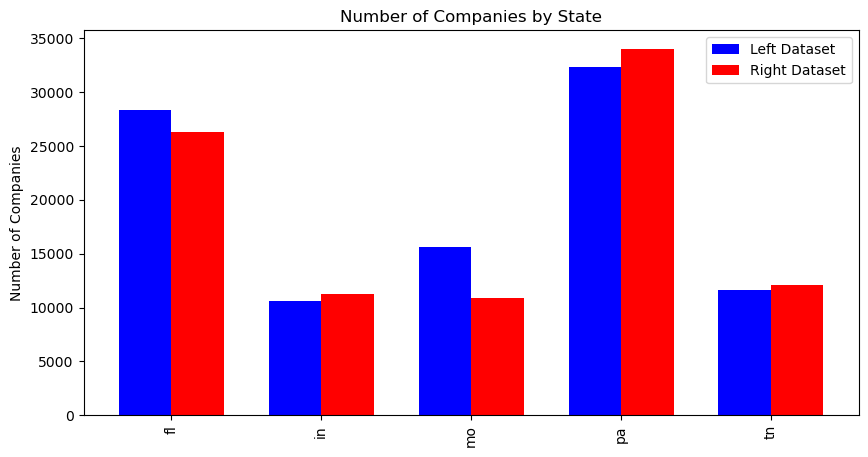

In [26]:
#Visualize the dataset 
import matplotlib.pyplot as plt
import numpy as np

# group data by state and count number of companies in each state for both datasets
left_grouped = left.groupby('state')['id_1'].count().reset_index(name='count')
right_grouped = right.groupby('state')['id_2'].count().reset_index(name='count')

# create a list of all states
states = sorted(list(set(left_grouped['state']) | set(right_grouped['state'])))

# create arrays of counts for left and right datasets
left_counts = np.zeros(len(states))
right_counts = np.zeros(len(states))

for i, state in enumerate(states):
    if state in left_grouped['state'].values:
        left_counts[i] = left_grouped[left_grouped['state']==state]['count']
    if state in right_grouped['state'].values:
        right_counts[i] = right_grouped[right_grouped['state']==state]['count']

# plot the bar chart
fig, ax = plt.subplots(figsize=(10,5))
ind = np.arange(len(states))  # the x locations for the states
width = 0.35  # the width of the bars

rects1 = ax.bar(ind - width/2, left_counts, width, label='Left Dataset', color='blue')
rects2 = ax.bar(ind + width/2, right_counts, width, label='Right Dataset', color='red')

# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Companies')
ax.set_title('Number of Companies by State')
ax.set_xticks(ind)
ax.set_xticklabels(states)
ax.legend()

# rotate the x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()


In [12]:
# Count NaN values in left dataset
print("Left dataset:")
print(left_dataset.isna().sum())

# Count NaN values in right dataset
print("\nRight dataset:")
print(right_dataset.isna().sum())

Left dataset:
id_1         0
name_1       0
address_1    0
city         0
state        0
zip_1        0
dtype: int64

Right dataset:
id_2            0
name_2          0
address_2    2799
city            0
state           0
zip_2           0
dtype: int64


In [13]:
# Since the right dataset is smaller and has more missing value
# We match the left dataset with the right dataset for faster process

In [14]:
def find_matches_extract_one(row, right_dataset, name_threshold=80, zip_threshold=80, address_threshold=80):
    best_name_match = process.extractOne(row['name_1'], right_dataset['name_2'].tolist(), scorer=fuzz.token_sort_ratio)
    best_zip_match = process.extractOne(str(row['zip_1']), right_dataset['zip_2'].astype(str).tolist(), scorer=fuzz.token_sort_ratio)
    best_address_match = process.extractOne(row['address_1'], right_dataset['address_2'].tolist(), scorer=fuzz.token_sort_ratio)
    
    if best_name_match[1] >= name_threshold and best_zip_match[1] >= zip_threshold and best_address_match[1] >= address_threshold:
        matched_rows = right_dataset[(right_dataset['name_2'] == best_name_match[0]) & (right_dataset['zip_2'] == best_zip_match[0]) & (right_dataset['address_2'] == best_address_match[0])]
        if len(matched_rows) > 0:
            index_right = matched_rows.index[0]
            row_right = right_dataset.loc[index_right]
            return (row['id_1'], row_right['id_2'], (best_name_match[1] + best_zip_match[1] + best_address_match[1]) / 3)
    return None


In [27]:
# goupe the data by state can speed up the whole matcing process
#takes for 30 min for this process

results = []

for state, group in left_dataset.groupby('state'):
    # Filter right_dataset by state
    right_group = right_dataset[right_dataset['state'] == state]
    # Perform matching within the group
    for _, row in group.iterrows():
        match = find_matches_extract_one(row, right_group)
        if match:
            results.append(match)

matches_df = pd.DataFrame(results, columns=['id_1', 'id_2','confidence_score'])
matches_df['confidence_score'] = matches_df['confidence_score'] / 100
high_confidence_matches = matches_df[matches_df['confidence_score'] >= 0.8]

print(f"Number of matching results: {len(results)}")

Number of matching results: 5065


In [31]:
print(high_confidence_matches.sort_values(ascending=False, by='confidence_score').head(10))


       id_1   id_2  confidence_score
3677  74808  92815               1.0
424    6547  53802               1.0
4119  81987   5305               1.0
2582  56421  83795               1.0
4783  91542   8009               1.0
2578  56375  67914               1.0
4127  82157  60077               1.0
4128  82160  60077               1.0
4129  82175  84174               1.0
771   13847  93646               1.0


In [32]:
# Merge with original dataset and show matched data with confidence score
matched_data = pd.merge(left, matches_df, on='id_1', how='left')
matched_data = pd.merge(matched_data, right, left_on='id_2', right_on='id_2', suffixes=('_1', '_2'))

In [33]:
# Print top 10 matched data with confidence score
top_matched_data = matched_data.sort_values(by='confidence_score', ascending=False).head(10)
print(top_matched_data[['id_1', 'id_2', 'confidence_score','name_1', 'name_2', 'address_1', 'address_2']])
print(f"Number of matched data: {len(matched_data)}")

       id_1     id_2  confidence_score                                name_1  \
4050  80504  57690.0               1.0                   xi'an sizzling woks   
2423  53239  77112.0               1.0                   poise hair boutique   
3911  78240  54044.0               1.0                        trattoria moma   
3073  64240  50358.0               1.0                 volpe real estate inc   
3890  79022  39620.0               1.0                 precision kettlebells   
2490  55510  80398.0               1.0  mestichelli barnes dental associates   
3889  77852  39620.0               1.0                 precision kettlebells   
3884  77807  56066.0               1.0                  momma mia's pizzeria   
3875  77670   9558.0               1.0                   cna computer repair   
1061  23292  74450.0               1.0              la giraldilla hanley inc   

                                    name_2            address_1  \
4050                   xi'an sizzling woks          

In [34]:
#export as csv file
matched_data[['id_1', 'id_2', 'confidence_score', 'name_1', 'name_2', 'address_1', 'address_2']].to_csv('matched_data.csv', index=False)